# 군집 DBSCAN (2)
## 1. 패키지 참조

In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, DataFrame
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler # MinMaxScaler사용해도 됨
from sklearn.metrics import silhouette_score

# 한글 글꼴 그래프
import sys
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

## 2. 데이터 가져오기

In [2]:
origin = read_excel('https://data.hossam.kr/G02/customer.xlsx', index_col='고객ID')
print(origin.info())
origin

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      200 non-null    object
 1   나이      200 non-null    int64 
 2   연수입     200 non-null    int64 
 3   지출점수    200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None


,성별,나이,연수입,지출점수
고객ID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## 3. 데이터 전처리
### 1) 연수입에 따른 지출점수 확인

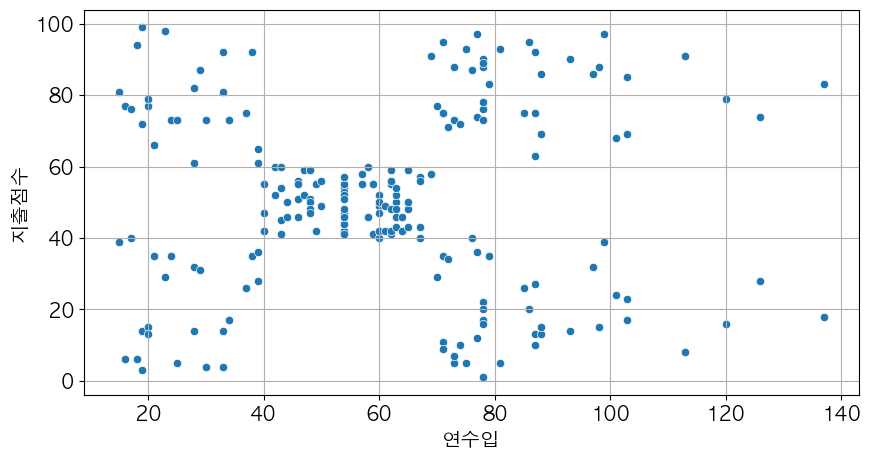

In [3]:
plt.figure(figsize=(10, 5))
sb.scatterplot(data=origin,
               x='연수입',
               y='지출점수')
plt.grid()
plt.show()
plt.close()

### 2) 필요한 필드 추출

In [4]:
x = origin.filter(['연수입', '지출점수'])
x 

,연수입,지출점수
고객ID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


### 3) 데이터 표준화

In [5]:
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)
x_std_df = DataFrame(x_std, columns = x.columns)
x_std_df

,연수입,지출점수
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## 4. DBSCAN 구현 (군집 모델 구현)
### 1) 모델 구축

In [6]:
dbscan = DBSCAN(eps=0.3, min_samples=5) # 보통 이렇게 두 파라미터를 준다
dbscan.fit(x_std_df)

DBSCAN(eps=0.3)

## 5. 군집 결과
### 1) 군집 결과 확인

In [7]:
cluster_label = dbscan.labels_
cluster_label

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  6,  4,  6,  4,  6, -1,
        6,  4,  6,  4,  6,  4,  6,  4,  6,  4, -1,  4,  6,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

> `-1` 값들은 어느 군집에 속하기 애매한 값들 -> 비군집 값들
>
> 이 결과 값은 파라미터를 조절하면 바뀐다

### 2) 시각화

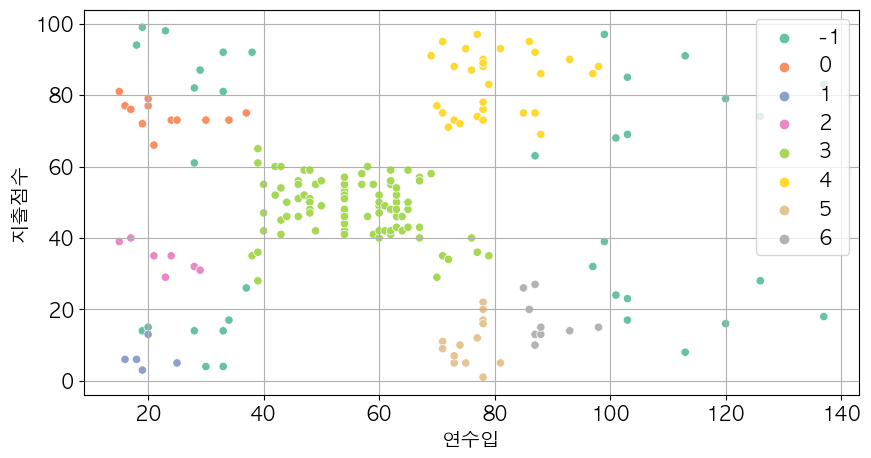

In [8]:
plt.figure(figsize = (10, 5))
sb.scatterplot(data=origin,
               x='연수입',
               y='지출점수',
               hue=cluster_label,
               palette='Set2')
plt.grid()
plt.show()
plt.close()

## 6. 핵심포인트 확인
- dbscan을 통해 추가적으로 얻을 수 있는 값: 핵심포인트의 인덱스, 핵심포인트의 실 데이터
    - `dbscan.core_sample_indices_`: 핵심포인트의 인덱스
    - `dbscan.components_`: 핵심포인트의 실 데이터
### 1) 핵심포인트의 인덱스 및 실데이터

In [9]:
# 인덱스
core_sample_indices = dbscan.core_sample_indices_
core_sample_indices

array([  1,   3,   5,   6,   9,  13,  15,  16,  18,  20,  21,  23,  26,
        31,  40,  42,  43,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 163, 165,
       166, 170, 172, 173, 174, 176, 178, 179])

In [10]:
# 실 데이터
components = dbscan.components_
components

array([[-1.73899919,  1.19570407],
       [-1.70082976,  1.04041783],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.58632148,  0.84631002],
       [-1.54815205,  1.04041783],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.43364376, -0.82301709],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -0.7065524 ],
       [-1.16645776,  0.88513158],
       [-0.86110232, -0.59008772],
       [-0.82293289, -0.55126616],
       [-0.82293289,  0.41927286],
       [-0.78476346,  0.18634349],
       [-0.78476346, -0.12422899],
       [-0.78476346, -0.3183368 ],
       [-0.78476346, -0.3183368 ],
       [-0.70842461,  0.06987881],
       [-0.70842461,  0.38045129],
       [-0.67025518,  0.14752193],
       [-0.67025518,  0.38045129],
       [-0.67025518, -0.20187212],
       [-0.67025518, -0.35715836],
       [-0.63208575, -0.00776431],
       [-0.63208575,

### 2) 학습 데이터 중 핵심 포인트의 인덱스와 일치하는 데이터 찾기

In [11]:
is_core_samples = []

for i in range(0, x_std_df.shape[0]):
    if i in core_sample_indices:
        is_core_samples.append(1)
    else:
        is_core_samples.append(0)

print(is_core_samples)

[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


> 1 = 핵심 포인트 (즉, 이를 중심으로 클러스터링을 할 수 있는 점들), 0 = 핵심포인트 아님

### 3) 시각화

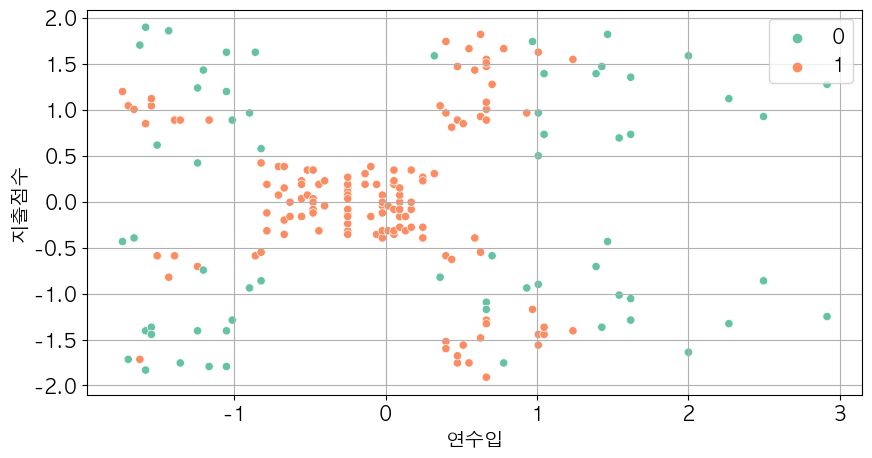

In [12]:
plt.figure(figsize = (10, 5))
sb.scatterplot(data=x_std_df,
               x='연수입',
               y='지출점수',
               hue=is_core_samples,
               palette='Set2')
plt.grid()
plt.show()
plt.close()

> 군집과 비군집 분리
>
> 군집의 종류를 떠나서 1은 군집이 된 값들, 0은 군집이 안 된 값들이다
>
> 현실 세계에서의 예제:
> 아파트가 판매된 지표들이라고 할 때, 1의 값들이 속한 곳은 밀집된 곳이므로 아파트 값이 더 비싸다고 볼 수 있다?